In [3]:
!pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434677 sha256=80291f970d03aa6a80226b6373236346cbf42e9a549b63abfe1ad81cab7a9a36
  Stored in directory: c:\users\georges\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [22]:
!pip install --upgrade gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108250 sha256=7be9244c99ae23b2969b24ced808a6f239f0c97d07a9fa2e57715a0b5e6cebb2
  Stored in directory: c:\users\georges\appdata\local\pip\cache\wheels\34\3d\14\f19c01a19c9201cdb6a76b049904d5226912569be919ad1eae
Successfully built smart-open


In [27]:
!pip install -U scikit-learn

In [28]:
import nltk
import re
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


## Citirea textului din fisier

In [7]:
with open("input.txt", "r") as fd:
    input_text = fd.read()

 ## Preprocesarea textului

#### Impartirea pe propozitii

In [8]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

sentences = nltk.sent_tokenize(input_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GeorgeS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
sentences

['Lorem Ipsum is simply dummy text of the printing and typesetting industry.',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book.",
 'It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.',
 'It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum']

#### Tokenizarea si eliminarea stopwords-urilor

In [10]:
import re
look_distance = 2
word_dict = dict()
s = []
for i in sentences:
    sentence = re.sub("[^a-zA-Z]", " ",  i.lower())
    y = [x for x in nltk.word_tokenize(sentence) if x not in stopwords.words('english')]
    s.append(y)
    for index in range(len(y)):
        context = []
        lower_index = 0 if index - look_distance < 0 else index - look_distance
        higher_index = len(y) if index + look_distance > len(y) else index + look_distance
        for kappa in range(lower_index, higher_index):
            if y[kappa] != y[index]:
                context.append(y[kappa])      
        word_dict[y[index]] = context
words_in_sentences = s

In [11]:
words_in_sentences

[['lorem',
  'ipsum',
  'simply',
  'dummy',
  'text',
  'printing',
  'typesetting',
  'industry'],
 ['lorem',
  'ipsum',
  'industry',
  'standard',
  'dummy',
  'text',
  'ever',
  'since',
  'unknown',
  'printer',
  'took',
  'galley',
  'type',
  'scrambled',
  'make',
  'type',
  'specimen',
  'book'],
 ['survived',
  'five',
  'centuries',
  'also',
  'leap',
  'electronic',
  'typesetting',
  'remaining',
  'essentially',
  'unchanged'],
 ['popularised',
  'release',
  'letraset',
  'sheets',
  'containing',
  'lorem',
  'ipsum',
  'passages',
  'recently',
  'desktop',
  'publishing',
  'software',
  'like',
  'aldus',
  'pagemaker',
  'including',
  'versions',
  'lorem',
  'ipsum']]

In [12]:
word_dict

{'lorem': ['including', 'versions', 'ipsum'],
 'ipsum': ['versions', 'lorem'],
 'simply': ['lorem', 'ipsum', 'dummy'],
 'dummy': ['industry', 'standard', 'text'],
 'text': ['standard', 'dummy', 'ever'],
 'printing': ['dummy', 'text', 'typesetting'],
 'typesetting': ['leap', 'electronic', 'remaining'],
 'industry': ['lorem', 'ipsum', 'standard'],
 'standard': ['ipsum', 'industry', 'dummy'],
 'ever': ['dummy', 'text', 'since'],
 'since': ['text', 'ever', 'unknown'],
 'unknown': ['ever', 'since', 'printer'],
 'printer': ['since', 'unknown', 'took'],
 'took': ['unknown', 'printer', 'galley'],
 'galley': ['printer', 'took', 'type'],
 'type': ['scrambled', 'make', 'specimen'],
 'scrambled': ['galley', 'type', 'make'],
 'make': ['type', 'scrambled', 'type'],
 'specimen': ['make', 'type', 'book'],
 'book': ['type', 'specimen'],
 'survived': ['five'],
 'five': ['survived', 'centuries'],
 'centuries': ['survived', 'five', 'also'],
 'also': ['five', 'centuries', 'leap'],
 'leap': ['centuries', 'a

## Generarea datelor de antrenare: vectori one-hot

In [13]:
import numpy as np
word_indices = np.array([x for x in range(len(word_dict.keys()))])

one_hot_vectors = np.zeros((word_indices.size, word_indices.max() + 1))
one_hot_vectors[np.arange(word_indices.size),word_indices] = 1

In [14]:
one_hot_vectors

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
from gensim.models import Word2Vec



model = Word2Vec(min_count=1)

model.build_vocab(words_in_sentences)  # prepare the model vocabulary

model.train(words_in_sentences, total_examples=model.corpus_count, epochs=model.epochs)




[('containing', 0.022727331), ('publishing', 0.02272733)]

In [66]:
model.predict_output_word(['took'], 5)

[('industry', 0.022727313),
 ('text', 0.02272731),
 ('passages', 0.022727309),
 ('software', 0.022727303),
 ('five', 0.022727303)]

In [33]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
#         print(model[word], word)
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\GeorgeS\.conda\envs\nnProject\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


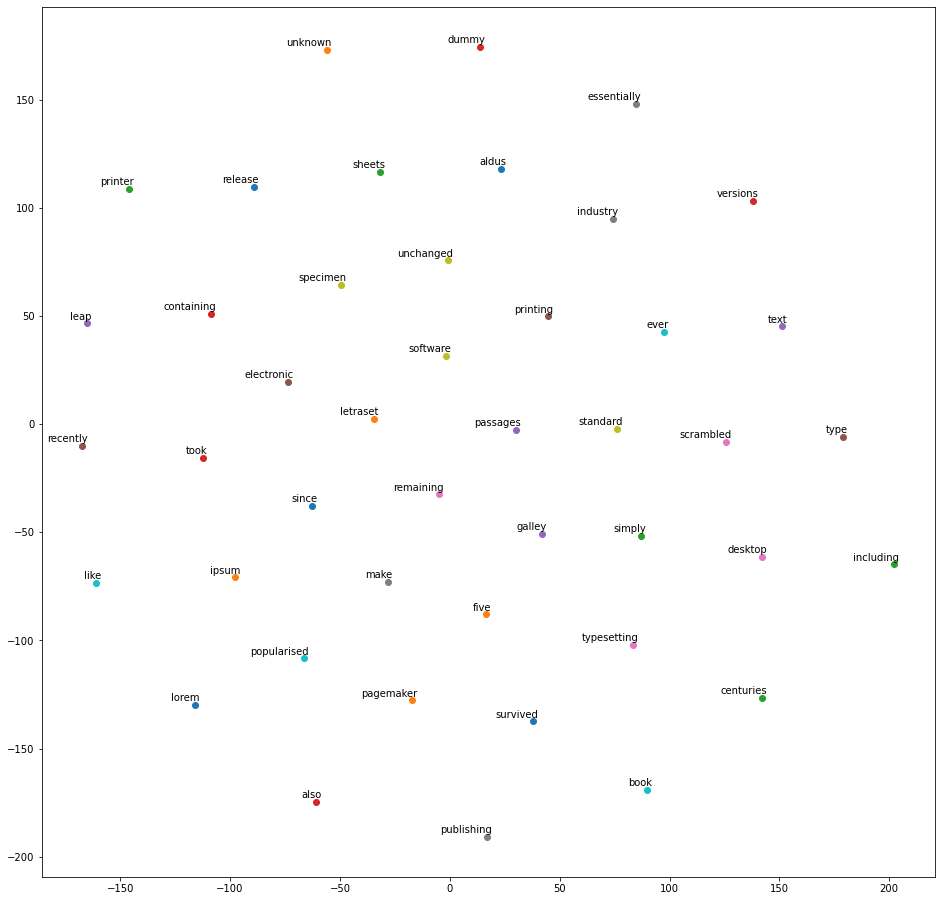

In [34]:
tsne_plot(model)